Author: Amruth Karun M V
Date: 16-Apr-2022

### JSE Financial Data Visualization and Regression Analysis
### Introduction
The objective of this problem is to analyze a dataset that contains correlated variables, visualize the given dataset using different charts, describe the relevance of these visualizations, what insights we get by using the particular graph, and perform simple linear regression for any two correlated variables, determine all parameters including confidence intervals, and Model valuation by checking all assumptions, constructing the relevant plots and also by testing of hypothesis.

### Dataset
The dataset used for the assignment is the Johannesburg Stock Exchange dataset which contains details about 50 non-financial firms with numerous financial metrics that are often used by the financial experts to value these companies. This provides us information about which companies are the biggest players in the market, and which company has the biggest chance of being bankrupt, the past data allows us to make total revenue, future stock predictions, etc., and perform other financial analyses. It consists of 400 rows and 21 columns and contains details of the 50 firms from 2010 to 2017.

In [1]:
# import packages
!pip install numpy pandas matplotlib seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('JSE Dataset Aug 2019.csv')
data.head(n=8)

,Company,firm,year,mktcap,sharepr,bkvalue,opincome,sharesno,EPS,BVPS,...,debteq,equity,avrgdebteq,dividends,div,retearnings,size,Q-ratio,EV,netprofit
0,AFRICAN MEDIA,1,2010,293352000.0,34.00,52529000.0,36104000,8628000,4.184516,6.088201,...,0.177466,87960000.0,0.143031,17257000,1,43988000.0,0,5.584572,249247000.0,24109000
1,AFRICAN MEDIA,1,2011,409830000.0,47.50,74191000.0,36585000,8628000,4.240264,8.598864,...,0.140868,113976000.0,0.143031,16870000,1,70237000.0,0,5.523985,364752000.0,28290000
2,AFRICAN MEDIA,1,2012,430976000.0,52.00,94311000.0,49987000,8288000,6.031250,11.379223,...,0.165339,134091000.0,0.143031,0,0,105030000.0,0,4.569732,381213000.0,40723000
3,AFRICAN MEDIA,1,2013,578088000.0,69.75,121227000.0,53374000,8288000,6.439913,14.626810,...,0.139873,161007000.0,0.143031,8122000,1,134663000.0,0,4.768641,503850000.0,41604000
4,AFRICAN MEDIA,1,2014,703545000.0,85.00,136062000.0,60565000,8277000,7.317265,16.438565,...,0.124467,175842000.0,0.143031,24666000,1,152749000.0,0,5.170768,599278000.0,48623000
5,AFRICAN MEDIA,1,2015,835876000.0,101.00,162078000.0,70156000,8276000,8.477042,19.584099,...,0.131180,201504000.0,0.143031,24295000,1,179760000.0,0,5.157245,731109000.0,56571000
6,AFRICAN MEDIA,1,2016,658960000.0,80.00,179189000.0,64433000,8237000,7.822387,21.754158,...,0.123187,218615000.0,0.143031,28241000,1,199342000.0,0,3.677458,658960000.0,53623000
7,AFRICAN MEDIA,1,2017,531564000.0,66.00,191439000.0,64117000,8054000,7.960889,23.769431,...,0.141870,230865000.0,0.143031,27219000,1,218678000.0,0,2.776676,416619000.0,56057000


In [3]:
print("Dataset Shape: ", data.shape)

# Get a summary of the numeric attributes in the dataset 
# (min, max, mean, std etc)
data.describe()

Dataset Shape:  (400, 21)


,firm,year,mktcap,sharepr,bkvalue,opincome,sharesno,EPS,BVPS,tdebt,debteq,equity,avrgdebteq,dividends,div,retearnings,size,Q-ratio,EV,netprofit
count,400.000000,400.000000,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,25.500000,2013.500000,2.937545e+10,66.516711,1.023722e+10,2.462132e+09,4.044175e+08,5.199439,23.812266,1.155667e+10,0.833906,1.226432e+10,0.823158,8.702176e+08,0.820000,9.309923e+09,0.440000,3.779568,3.154176e+10,1.898542e+09
std,14.448942,2.294157,5.998713e+10,96.856565,2.612715e+10,7.217558e+09,5.231287e+08,9.687249,43.517639,2.596080e+10,1.075512,2.864485e+10,0.869998,2.694631e+09,0.384669,2.272712e+10,0.497009,18.926723,6.415334e+10,6.522314e+09
min,1.000000,2010.000000,1.890000e+07,0.030000,-2.280000e+10,-1.045300e+10,8.054000e+06,-10.624739,-49.952328,9.819150e+05,0.002041,-1.020000e+09,0.050000,0.000000e+00,0.000000,-1.405000e+09,0.000000,-152.627715,1.219885e+07,-9.634000e+09
25%,13.000000,2011.750000,5.131687e+08,2.795000,2.384798e+08,4.985200e+07,1.262151e+08,0.311930,1.877590,2.924988e+08,0.196372,4.252905e+08,0.229020,5.373800e+06,1.000000,1.855368e+08,0.000000,0.914002,5.282090e+08,2.617967e+07
50%,25.500000,2013.500000,3.657267e+09,19.800000,1.961822e+09,3.010500e+08,2.129125e+08,1.383875,9.125788,2.039756e+09,0.460851,2.769624e+09,0.457113,4.884700e+07,1.000000,1.377292e+09,0.000000,1.798539,4.321019e+09,1.863510e+08
75%,38.000000,2015.250000,3.089821e+10,96.335000,8.780669e+09,1.551200e+09,4.286513e+08,6.240189,26.437739,1.078645e+10,1.051826,1.133244e+10,1.168491,6.260000e+08,1.000000,6.946420e+09,1.000000,3.891243,3.133623e+10,1.281650e+09
max,50.000000,2017.000000,4.080000e+11,609.280000,2.150000e+11,4.964500e+10,2.662199e+09,71.493438,329.844741,1.820000e+11,8.100037,2.170000e+11,4.145244,2.350600e+10,1.000000,1.770000e+11,1.000000,310.121209,4.180000e+11,8.169586e+10


### Data Visualization
Here, we use different types of graphs and charts to understand the relationship between the data points, their distribution, composition and derive insights from the data to identify the financial status, stock market trends and which companies are the major contributors in the Johannesburg market.

### 1. Horizontal Bar Plot of Net Profit in Each Year

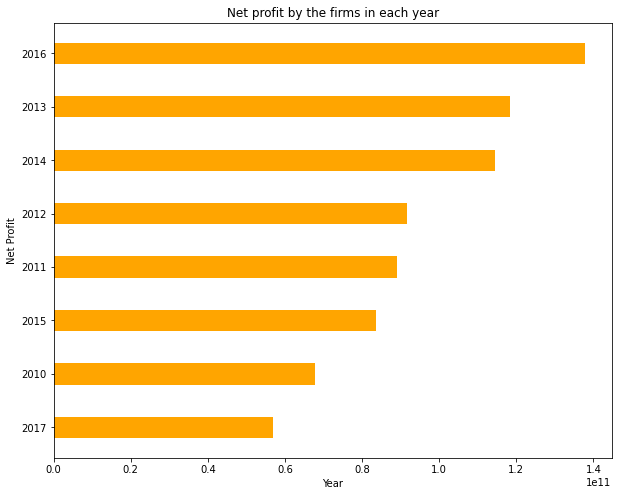

In [4]:
plt.figure(figsize = ( 10 , 8 ))

yearwise_net_profit = data.groupby(by='year').agg({'netprofit':sum}).reset_index()
yearwise_net_profit = yearwise_net_profit.sort_values('netprofit')

# create bar plot for the net profit in each year
plt.barh(yearwise_net_profit['year'].apply(str), yearwise_net_profit['netprofit'],
        color ='orange', height=0.4)
 
plt.xlabel("Year")
plt.ylabel("Net Profit")
plt.title("Net profit by the firms in each year")
plt.show()

The above horizontal bar plot gives an idea about the total net profit from all firms from 2010 to 2017. Here, the graph is sorted in the increasing order of net profit. This gives us a clear picture about the year with the maximum and the year with the minimum profit. The maximum profit is recorded for the year 2016 and the minimum profit is in the following year 2017.

### 2. Histogram for BVPS Distribution

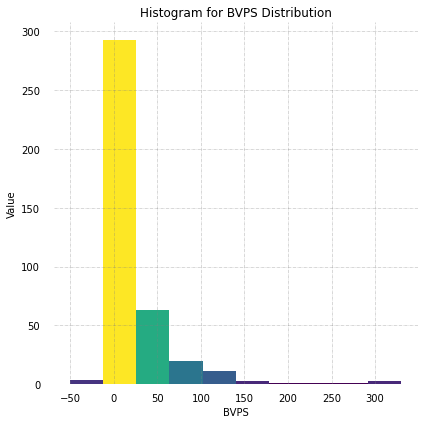

In [5]:
# Creating histogram
fig, axs = plt.subplots(1, 1, figsize =(6, 6), tight_layout = True)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# Creating histogram
N, bins, patches = axs.hist(data['BVPS'], bins=10)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features   
plt.xlabel("BVPS")
plt.ylabel("Value")
plt.title('Histogram for BVPS Distribution')
 
# Show plot
plt.show()

Book value per share (BVPS) takes the ratio of a firm's common equity divided by its number of shares outstanding. This indicates the firm's net asset value on a per share basis. When a firm gets liquidated, BVPS is the amount that the shareholders get and this values is used to calculate the share price of the firm. Here, in above distribution we can see that majority of the BVPS values lie closer to zero and some are in the range 50 to 100. When the BVPS value increases, the stock is perceived as more valuable and the stock price should increase. We can have a better understanding of the company value by comparing BVPS against the share price.

### 3. Box Plot for Share Price in Each Year

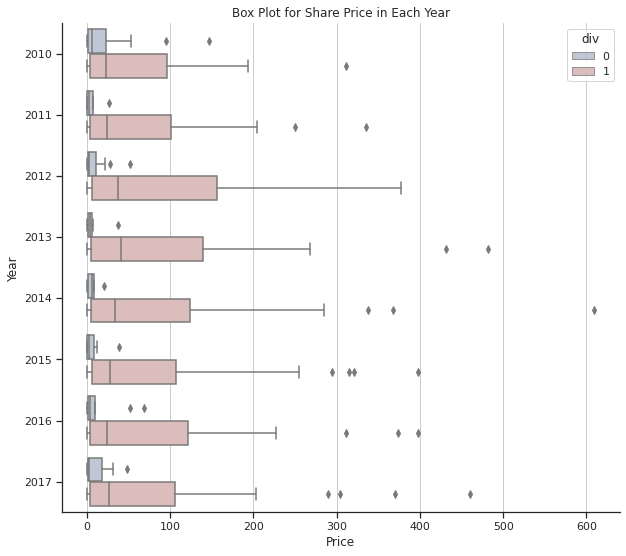

In [6]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(10, 9))

# create boxplot
sns.boxplot(x = 'sharepr', 
            y = 'year', 
            data = data, 
            hue = data['div'], orient='h', 
            palette = 'vlag')


ax.xaxis.grid(True)
ax.set(ylabel="Year", xlabel="Price", title="Box Plot for Share Price in Each Year")
sns.despine()

Boxplot gives us information about the data distribution, mean, median and the outliers in the data across different groups. Here we have the yearwise distribution of the share price and highlights the stocks with no dividends. From this distribution we can see that the share price range is near hundred in most of the cases and we can observe a maximum share price in the year 2014. These high values can be observed as outliers in black which is far away from the actual distribution of data.

### 4. Density Plot for Showing the Distribution of Debts

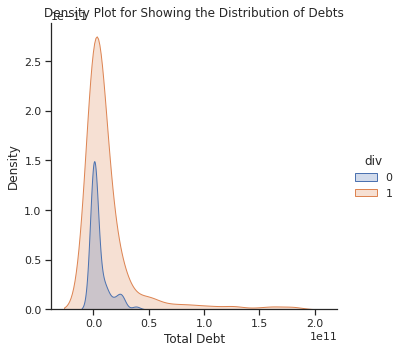

In [7]:
# Create density plot for debt data
density_plot = sns.displot(x=data["tdebt"], hue=data["div"], 
            kind="kde", fill=True)

density_plot.set(xlabel="Total Debt", 
                 title="Density Plot for Showing the Distribution of Debts")
sns.despine()

The above density plot shows the distribution of total debt of these firms when there is dividend and when there is no dividend. This is a smoothed version of the histogram using kernel density estimations. From the above density plot we can see that the debt distribution is high in a particular region and the density decreases as the debt increases and in these high debt areas are with dividend payouts. This might be because of **dividend recapitalization** where the company takes on new debt in order to pay a special dividend to private investors or shareholders.

### 5. Pie Chart for Year-wise Retained Earnings

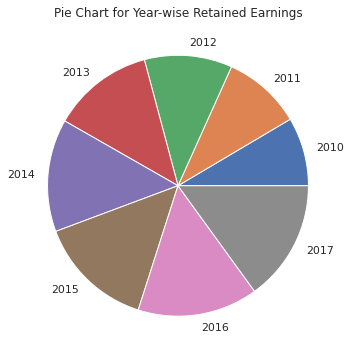

In [8]:
yearwise_earnings = data.groupby(by='year').agg({'retearnings':sum}).reset_index()

f, ax = plt.subplots(figsize=(7, 6))

# Year wise contribution to retained earnings
plt.pie(yearwise_earnings["retearnings"], labels = yearwise_earnings["year"])
ax.set(title="Pie Chart for Year-wise Retained Earnings")
# show plot
plt.show()

Pie chart is used to represent the compositon of data. Here, the composition of retained earnings from each year is visualized. Retained earnings or earnings surplus is the amount that a company has left after paying all the direct and indirect costs, taxes and dividends to the shareholders. From the above pie chart we see the proportion of the earnings in each year and we can observe higher values from 2014 - 2017. This increase in the retained earnings indicates increased profits for the last 4 years in the dataset.

### 6. Line Plot of Stock Price Variations from 2010 to 2017

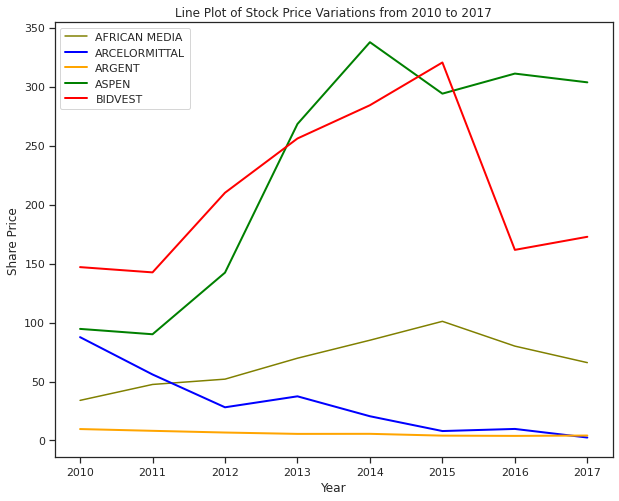

In [9]:
f, ax = plt.subplots(figsize=(10, 8))

# Line plot for first 5 firms 
plt.plot( 'year', 'sharepr', data=data[(data.Company == "AFRICAN MEDIA")], 
         color='olive', label="AFRICAN MEDIA" )
plt.plot( 'year', 'sharepr', data=data[(data.Company == "ARCELORMITTAL")], 
         color='blue', linewidth=2, label="ARCELORMITTAL")
plt.plot( 'year', 'sharepr', data=data[(data.Company == "ARGENT")], 
         color='orange', linewidth=2, label="ARGENT")
plt.plot( 'year', 'sharepr', data=data[(data.Company == "ASPEN")], 
         color='green', linewidth=2, label="ASPEN")
plt.plot( 'year', 'sharepr', data=data[(data.Company == "BIDVEST")], 
         color='red', linewidth=2, label="BIDVEST")

ax.set(title="Line Plot of Stock Price Variations from 2010 to 2017",
      xlabel="Year", ylabel="Share Price")

plt.legend()
plt.show()

The above line plot is used to visualize the trends in share prices of the first five non-financial firms in the JSE dataset. There is a big increase in the stock prices of ASPEN and BIDVEST and for other firms, the rise in stock prices are either low or it is gradually decreasing from 2010 to 2017 (blue and yellow lines). For ASPEN the price becomes steady after a while but the prices of BIDVEST dropped in 2016. This type of line plots are really useful in representing the general trend in data and we can use it to compare the financial trends of different companies we are interested in.

### 7. Violin Plot for EPS in Each Year

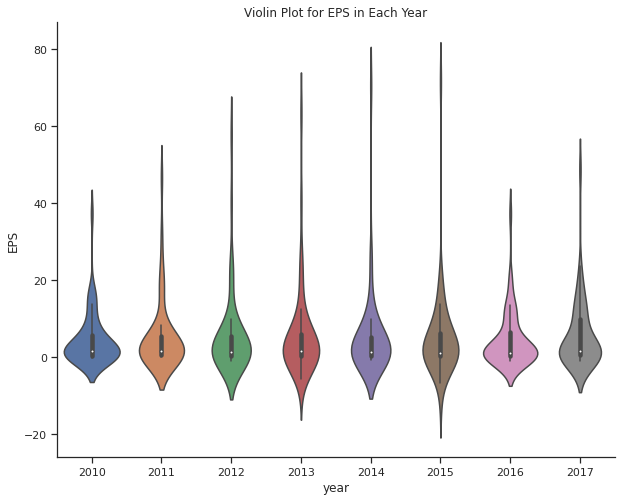

In [10]:
plt.figure(figsize = ( 10 , 8 ))

# Create violin plot for EPS distribution
violin_plot = sns.violinplot(x=data["year"], y=data["EPS"])

violin_plot.set(title="Violin Plot for EPS in Each Year")
sns.despine()

The above violin plot shows the distribution of EPS in each year. Earnings Per Share (EPS) is the companies net profit by number of common shares it has outstanding. This value can be used to estimate how much money the company makes for each share of its stock. From this violin plot we can observe the density of data at each point. For most of the companies, the EPS value is close to zero and a small proportion goes to the negative side also. In 2014 and 2015 we can see very high EPS values which indicates high profits.

### 8. Scatter Plot Between Operating Income and Market Cap

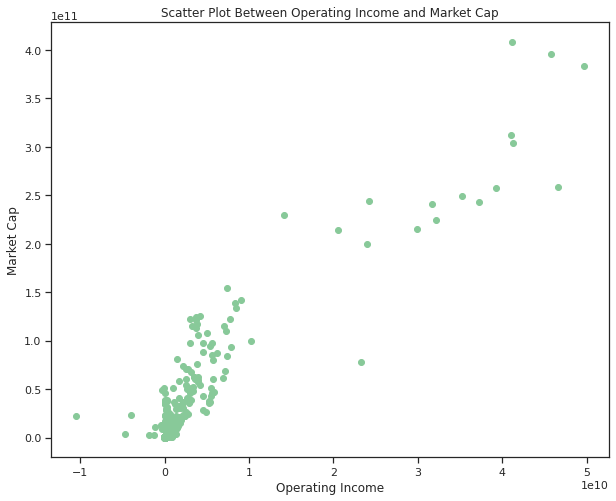

In [11]:
plt.figure(figsize = ( 10 , 8 ))

plt.scatter(data["opincome"], data["mktcap"], color = '#88c999')
plt.title("Scatter Plot Between Operating Income and Market Cap")
plt.ylabel("Market Cap")
plt.xlabel("Operating Income")
plt.show()

The above scatter plot shows the relationship between Market Capitalization and Operating Income. Market cap is the most recent market value of the company's outstanding shares. This value indicates how much the company is valued and how much potential it has. While the operating income is the gross income left after subracting operating and other costs which indicates how much of the company's revenue will eventually become profit and is a key indicator of the performance of the company and has a positive relationship with the market cap as we can see in the scatter plot.

## Regression Analysis

This Johannesburg Stock Exchange dataset consist of different financial metrics that can be used for different financial analysis. Some of those metrics are calculated from other using some mathematical formula (eg: EV = MarketCap + Total Debt − Cash). These pair of attributes show a perfect linear relationship which is obvious and provides no relevant insights from our analysis perspective. There are other attributes gives us information about the profit of the organization, revenue and how the share prices vary with these financial indicators. Here, we use **Simple Linear Regression** to analyse the relationship between two attributes of the JSE dataset.

In [12]:
# Check the correlation between the attributes
data.corr()

,firm,year,mktcap,sharepr,bkvalue,opincome,sharesno,EPS,BVPS,tdebt,debteq,equity,avrgdebteq,dividends,div,retearnings,size,Q-ratio,EV,netprofit
firm,1.000000e+00,3.623061e-14,0.006176,-0.025340,0.140730,0.050468,-0.082896,0.095377,0.194775,-0.061081,-0.157357,0.054666,-0.191641,0.024605,-0.074403,0.063612,-9.772039e-02,-0.015714,-0.007609,0.009554
year,3.623061e-14,1.000000e+00,0.025193,0.045497,0.058588,-0.002923,0.042869,0.002600,0.079346,0.129916,0.070419,0.086379,-0.000093,0.052233,0.039760,0.074423,-1.470207e-14,-0.041992,0.041039,0.011821
mktcap,6.176060e-03,2.519260e-02,1.000000,0.716952,0.780870,0.917076,0.401270,0.738437,0.554334,0.852877,-0.200648,0.864832,-0.222939,0.868171,0.180381,0.847065,5.223822e-01,0.015190,0.994571,0.694731
sharepr,-2.534027e-02,4.549671e-02,0.716952,1.000000,0.578960,0.596949,0.049010,0.837370,0.661586,0.571936,-0.291888,0.631651,-0.327956,0.507861,0.259748,0.674302,6.312629e-01,0.050151,0.707729,0.522883
bkvalue,1.407297e-01,5.858819e-02,0.780870,0.578960,1.000000,0.790997,0.270655,0.724018,0.864207,0.786312,-0.104849,0.949915,-0.125882,0.741035,0.086179,0.942299,3.991857e-01,-0.018886,0.773528,0.612906
opincome,5.046776e-02,-2.922668e-03,0.917076,0.596949,0.790997,1.000000,0.350279,0.791212,0.560763,0.823726,-0.134606,0.874548,-0.152119,0.880811,0.164364,0.845645,3.528562e-01,0.004471,0.897487,0.750418
sharesno,-8.289556e-02,4.286895e-02,0.401270,0.049010,0.270655,0.350279,1.000000,0.076291,0.027854,0.383513,0.016156,0.308833,0.034277,0.367956,0.010258,0.248401,3.019621e-01,-0.009579,0.410147,0.211360
EPS,9.537673e-02,2.600260e-03,0.738437,0.837370,0.724018,0.791212,0.076291,1.000000,0.719382,0.628644,-0.212662,0.750570,-0.251169,0.611286,0.220420,0.779675,4.309454e-01,0.016301,0.715044,0.630388
BVPS,1.947754e-01,7.934646e-02,0.554334,0.661586,0.864207,0.560763,0.027854,0.719382,1.000000,0.560649,-0.149349,0.778802,-0.177360,0.494784,0.134199,0.809047,4.496653e-01,-0.028493,0.540904,0.491667
tdebt,-6.108057e-02,1.299156e-01,0.852877,0.571936,0.786312,0.823726,0.383513,0.628644,0.560649,1.000000,-0.047398,0.900197,-0.105217,0.845888,0.123139,0.873027,4.504887e-01,-0.011915,0.882428,0.595605


Here, we take the regression plot between operating income and market capitalization. We can observe a linear relationship between *opincome* and *mktcap*. When the operating income increases, the market cap also increases. This means we can use operating income as an independent variable to predict the market cap. The correlation between these two variables is calculated as **0.917076** which indicates a good positive relationship. While there are other factors that have an impact on the share price and market cap, we can use operating income to predict the market cap using simple linear regression even though the relationship is not fully linear in nature. The scatter plot with the regression line is shown in the plot below.

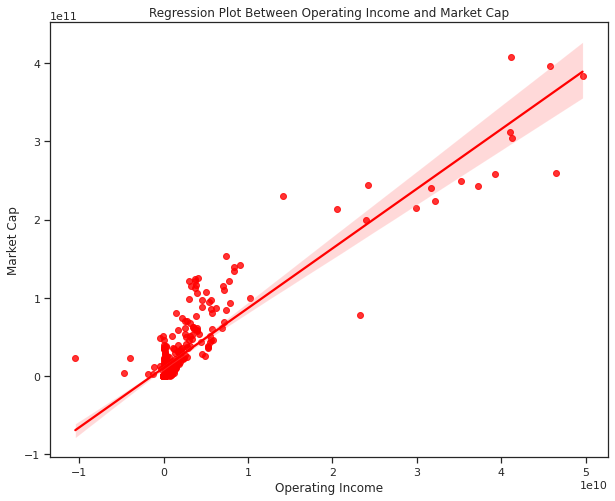

In [13]:
plt.figure(figsize = ( 10 , 8 ))

# Create the regression plot
sns.regplot(x=data["opincome"], y=data["mktcap"], color='red')
plt.title("Regression Plot Between Operating Income and Market Cap")
plt.ylabel("Market Cap")
plt.xlabel("Operating Income")
plt.show()

### Perform Simple Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = data["opincome"].values.reshape(-1, 1)
y = data["mktcap"].values.reshape(-1, 1)

# Calculate mean and standard deviation
x_bar = np.mean(x)
y_bar = np.mean(y)

std_x = np.std(x)
std_y = np.std(y)

print("Descriptive Statistics:")
print("Mean of x = ", x_bar)
print("Mean of y = ", y_bar)

print("\nStandard deviation of x = ", std_x)
print("Standard deviation of y = ", std_y)

r  = np.corrcoef(data["opincome"], data["mktcap"])[1][0]
r2 = r * r
print("\nCorrelataion coefficient (r) = ", r)
print("r squared value (r2) = ",r2)

''' 
Fit the dataset using the LinearRegression model.
Here the full dataset is used inorder to understand
the relationship between the two selected attributes
and also to determine all the parameters and check the
relationship between correlation coefficient and
coefficient of determination.
'''

lr = LinearRegression()
lr.fit(x , y)
y_predict = lr.predict(x)

# print predicted values
# print(y_predict)

b_1 = lr.coef_[0][0]
b_0 = lr.intercept_[0]
print("\nModel slope (b1) = ", b_1)
print("Model intercept (b0) = ", b_0)
print("Regression Equation (y_cap) = {0} + {1} * x".format(b_0, b_1))

MSE = mean_squared_error(y, y_predict)
# Calculate Root Mean Square Error(RMSE)
RMSE = np.sqrt(MSE)

print("\nMSE value = ", MSE)
print("RMSE value = ", RMSE)

# Calculate coefficient of determination
R2 = r2_score(y, y_predict)
print("\nR2 Score (Coefficient of determination) = ", R2)
print("{:2f} percent variation is explained by the model.".format(R2 * 100))

'''
# Get summary using stats model api
import statsmodels.api as sm
x = sm.add_constant(x.ravel())
results = sm.OLS(y,x).fit()
print(results.summary())
'''

residual = y - y_predict
residual_squared = residual * residual
RSS = sum(residual_squared)[0]
print("\nSum of squared residuals (RSS) = ", RSS)

variation = y - y_bar
variation_squared = variation * variation
TSS = sum(variation_squared)[0]
print("Sum of total variation squared (TSS) = ", TSS)
calculated_R2 = (TSS - RSS) / TSS
print("Calculated R2 value =", calculated_R2)

Descriptive Statistics:
Mean of x =  2462132121.275
Mean of y =  29375451863.09767

Standard deviation of x =  7208530172.24847
Standard deviation of y =  59912103482.32388

Correlataion coefficient (r) =  0.9170756707194019
r squared value (r2) =  0.8410277858254408

Model slope (b1) =  7.62207151421611
Model intercept (b0) =  10608904757.291008
Regression Equation (y_cap) = 10608904757.291008 + 7.62207151421611 * x

MSE value =  5.7062442673161286e+20
RMSE value =  23887746371.97098

R2 Score (Coefficient of determination) =  0.8410277858254411
84.102779 percent variation is explained by the model.

Sum of squared residuals (RSS) =  2.282497706926452e+23
Sum of total variation squared (TSS) =  1.4357840574706748e+24
Calculated R2 value = 0.8410277858254412


For the JSE dataset, we perform Simple Linear Regression with *opincome* as independant variable(x) and *mktcap* as dependend variable (y). We use LinearRegression from *sklearn* to fit our dataset. The mean of operating income is equal to **2462132121.275** and mean of market cap is **29375451863.09**. Their standard deviations are **7208530172.24** and **59912103482.32** respectively. The correlation coefficient (r) is calculated to be **0.917**. This indicates a high positive correlation between operating income and market cap. After fitting the model with our data, the obtained slope **b1 = 7.62** and model intercept **b0 = 10608904757.29**. Therefore, the regression equation is **y_cap = 10608904757.291008 + 7.62207151421611 * x**. This means for every unit increase in operating income there is a 7.62 times increase in market cap and when the operating income is zero, the market cap is a constant value equal to the intercept. <br>

The MSE and RMSE values are also calculated from the predicted y value which is 5.70e+20 and 23887746371.97 respectively. The residual values are calculated by subtracting the predicted values from the observed market cap. The sum of squared residuals (RSS) and sum of squared to total variation (TSS) is calculated and from that the R2 score is calculated as **(TSS - RSS) / TSS**. The calculated coefficient of determination (R2) value is observed to be **0.84102**. This means 84 percent of the variation is explained by the model. We want the R2 value as high as possible i.e close to 1. Here only 16 percent of the variation is not explained by the model which can be due to other factors or random variation. 

### Standard Error Estimates

In [17]:
N = len(residual)
degrees_of_freedom = N - 2

# Calculate standard error estimates
sigma = np.sqrt(RSS/degrees_of_freedom)
print("Regression standard error(sigma) = ", sigma)

x_bar_square = x_bar**2
sum_x_diff_square = sum((x - x_bar)**2)
sigma_beta0 = sigma * np.sqrt((1/N) + (x_bar_square / sum_x_diff_square))[0]
print("Standard error estimate of Beta0 =", sigma_beta0)

sigma_beta1 = sigma / np.sqrt(sum_x_diff_square)[0]
print("Standard error estimate of Beta1 =", sigma_beta1)

Regression standard error(sigma) =  23947690622.739075
Standard error estimate of Beta0 = 1265302901.8614695
Standard error estimate of Beta1 = 0.16610661293292012


The standard error estimates are used to calculate the accuracy of predictions made with the regression line. Here, we calculate the standard error estimate sigma as **23947690622.73**, for Beta0 as **1265302901.86** and for Beta1 as **0.1661**. The smaller the value of a standard error of estimate, the closer are the dots to the regression line and better is the estimate based on the equation of the line. Here, the calculated error estimates are higher, this shows the variation in our predictions.

### Confidence Intervals and Hypothesis Testing
We construct a 95% confidence interval for the best estimation of the above parameters. The interval is the set of values for which a hypothesis test to the level of 5% cannot be rejected.

In [18]:
from scipy import stats

# Significance level
alpha = 0.05
print("Significance level (alpha) =", alpha)
print("Degrees of freedom =", degrees_of_freedom)
# Calculate critical value for two-tailed test
t_value = stats.t.ppf(1 - (alpha/2), degrees_of_freedom)
print("Critical value (t_alpha_by_two, n-2) =",t_value)

print("\nModel intercept (b0) = ", b_0)
print("Model slope (b1) = ", b_1)

# Calculate confidence interval for beta values
conf_beta0_right = b_0 + (t_value * sigma_beta0)
conf_beta0_left = b_0 - (t_value * sigma_beta0)
print("\nConfidence interval for Beta0 = [{}, {}]"
      .format(conf_beta0_left, conf_beta0_right))

conf_beta1_right = b_1 + (t_value * sigma_beta1)
conf_beta1_left = b_1 - (t_value * sigma_beta1)
print("Confidence interval for Beta1 = [{}, {}]"
      .format(conf_beta1_left, conf_beta1_right))

# Perform Hypothesis Test
print("\nNull Hypothesis: Beta1 = 0 \nAlternate Hypothesis: Beta1 != 0")

t_statistic = b_1 / sigma_beta1
print("Test statistic t =", t_statistic)

if(t_statistic > t_value):
    print("We Reject the Null Hypotheis."\
          " The model is statistically significant."\
          " Beta1 != 0")
else:
    print("The model is not statistically significant."\
          "We accept the Null Hypothesis. Beta1 = 0")

Significance level (alpha) = 0.05
Degrees of freedom = 398
Critical value (t_alpha_by_two, n-2) = 1.9659423239761926

Model intercept (b0) =  10608904757.291008
Model slope (b1) =  7.62207151421611

Confidence interval for Beta0 = [8121392229.871651, 13096417284.710365]
Confidence interval for Beta1 = [7.295515493558951, 7.9486275348732685]

Null Hypothesis: Beta1 = 0 
Alternate Hypothesis: Beta1 != 0
Test statistic t = 45.88662293231022
We Reject the Null Hypotheis. The model is statistically significant. Beta1 != 0


The confidence interval for beta0 = [8121392229.871651, 13096417284.710365] and for beta1 = [7.295515493558951, 7.9486275348732685] by conducting a two tailed student t-test with a significance level alpha = 0.05 (95% confidence interval). The critical value (t α/2 ) = **1.965** comes from the student t-distribution with (n – 2) degrees of freedom. We have a sample distribution of 400. i.e the degrees of freedom = 398. Then we perform the hypothesis test compute the test statistic t = **45.88** which is greater than the critical value. This indicates that our model is statistically significant and we can reject the null hypothesis and accept the alternate hypotheis Beta1 != 0. The slope is significantly different from zero and there is a statistically significant relationship between operating income and market cap.

### Residual Plot 
The resiudal value is how much the regression line vertically misses the observed data point. A residual plot has the residual values on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data. The residual plot for the model created is given below.

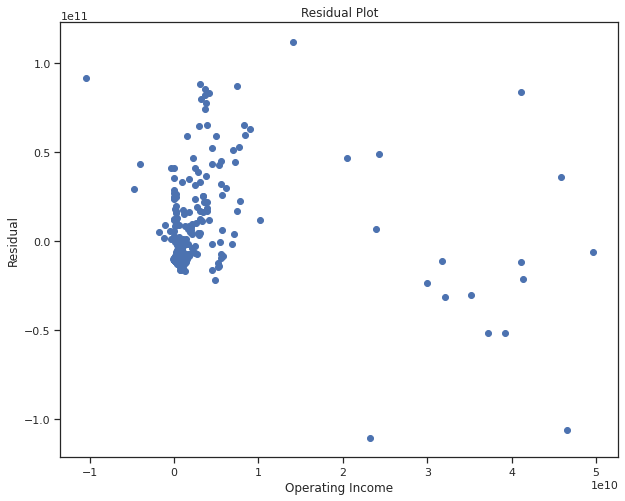

In [19]:
plt.figure(figsize = ( 10 , 8 ))

# Create the residual plot 
plt.scatter(x = x, y = residual)
plt.title("Residual Plot")
plt.ylabel("Residual")
plt.xlabel("Operating Income")
plt.show()

### Residual vs Fits Plot
Residuals versus fits plot is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

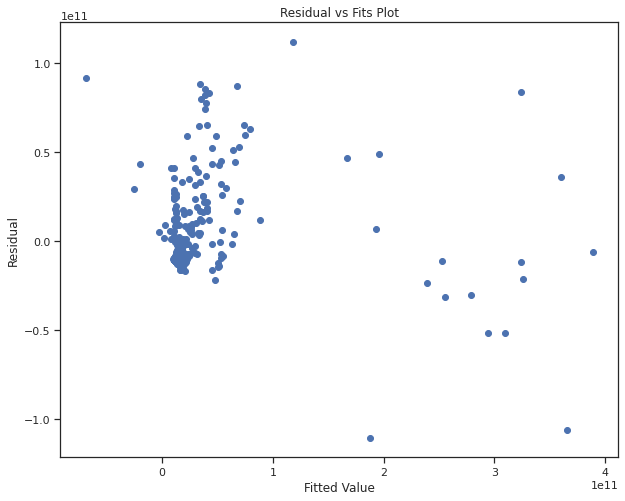

In [20]:
plt.figure(figsize = ( 10 , 8 ))

# Create the residual vs fits plot
plt.scatter(x = y_predict, y = residual)
plt.title("Residual vs Fits Plot")
plt.ylabel("Residual")
plt.xlabel("Fitted Value")
plt.show()

Both the above plots gives the simialr information. From the above residual plots we can see that the pattern formed is not exactly a scatter pattern.  In some areas the the density is higher and there is a fanning out pattern in some portions. This indicates that a linear model may not be appropriate for the given problem and probably we need a non-linear model or a model with higher order of terms in x must be required to understand the relationship between the variables.

### Normal P-P Plot
The P-P plot is a graphical representation used to determine how well a given data set fits a specific probability distribution that we are testing. The normal P-P plot plots the residuals against the expected values of the residuals as if it is taken from a normal distribution. When the residuals are normally distributed, it creates a straight line. The P-P plot compares the observed cumulative distribution function (CDF) of the standardized residual to the expected CDF of the normal distribution.

<Figure size 720x576 with 0 Axes>

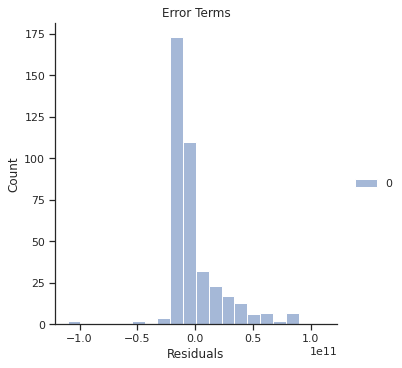

In [21]:
# Plot the histogram of the error terms
plt.figure(figsize = ( 10 , 8 ))
sns.displot(residual, bins = 20)
plt.title('Error Terms')
plt.xlabel('Residuals')
plt.show()

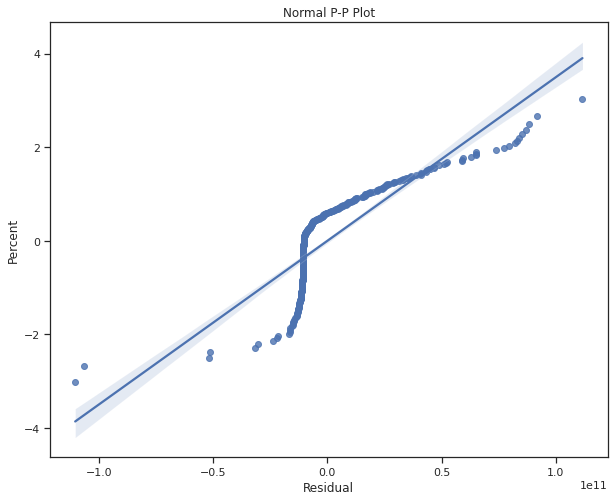

In [22]:
from scipy.stats import norm, rankdata

plt.figure(figsize = ( 10 , 8 ))

# Rank the data with by placing min rank for a tie
ranks = rankdata(residual, method='min')

cumulative_prob = (ranks - 0.5) / N
percent = norm.ppf(cumulative_prob)

plt.xlabel('Residual')
plt.ylabel('Percent') 
plt.title('Normal P-P Plot') 
sns.regplot(x=residual, y=percent)
plt.show()

From the previous histogram for the residuals we have seen that the distribution is not exactly normal. The above normal plot clearly indicates a curvature. The curvature in both ends of the normal probability plot indicates non-normality. This means that our assumptions are not fully valid and a linear model may not be perfect fit for this problem.

### Conclusion
We have successfully explored the JSE dataset about the 50 non-financial firms frrom 2010 - 2017. This dataset consist of total of 400 rows and 21 columns which includes different financial metrics used to value the company, net profit, debt, equity and other financial indicators. Using different types of plots, we were able to visualize the different aspects of the dataset, understand the composition, the relationship between the attributes, identify the derived attributes and understand the distribution of different attributes. Then we performed simple linear regression to identify the reletionship between market cap and operating income. We can observe a positive relationship between the two variables. For better understanding of the relationship, we determined all the parameters including standard error estimates, residual plots normal plot, computed confidence intervals and performed the hypothesis test to validate our model.